In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
#import all regression model
from sklearn.linear_model import LogisticRegression
#import all classification model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
#import all evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#warnings
import warnings
warnings.filterwarnings('ignore')

#***Load Dataset:-***

In [2]:
#load dataset
df=pd.read_csv('/content/alzheimers_prediction_dataset.csv')

In [3]:
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [4]:
#shape of dataset
df.shape

(74283, 25)

#***EDA(Explotary Data Analysis):-***

In [5]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

In [6]:
#dataset describe
df.describe()

,Age,Education Level,BMI,Cognitive Test Score
count,74283.000000,74283.000000,74283.000000,74283.000000
mean,71.964703,9.487514,26.780639,64.654241
std,12.980748,5.757020,4.764679,20.153247
min,50.000000,0.000000,18.500000,30.000000
25%,61.000000,4.000000,22.700000,47.000000
50%,72.000000,9.000000,26.800000,65.000000
75%,83.000000,14.000000,30.900000,82.000000
max,94.000000,19.000000,35.000000,99.000000


In [7]:
#data missing values
df.isnull().sum()

,0
Country,0
Age,0
Gender,0
Education Level,0
BMI,0
Physical Activity Level,0
Smoking Status,0
Alcohol Consumption,0
Diabetes,0
Hypertension,0


In [8]:
#check the duplicated rows
df.duplicated().sum()

0

In [9]:
#check the column names
df.columns

Index(['Country', 'Age', 'Gender', 'Education Level', 'BMI',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s', 'Cognitive Test Score',
       'Depression Level', 'Sleep Quality', 'Dietary Habits',
       'Air Pollution Exposure', 'Employment Status', 'Marital Status',
       'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level',
       'Income Level', 'Stress Levels', 'Urban vs Rural Living',
       'Alzheimer’s Diagnosis'],
      dtype='object')

In [10]:
cate_col=df.select_dtypes(include='object').columns
cate_col

Index(['Country', 'Gender', 'Physical Activity Level', 'Smoking Status',
       'Alcohol Consumption', 'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s', 'Depression Level', 'Sleep Quality',
       'Dietary Habits', 'Air Pollution Exposure', 'Employment Status',
       'Marital Status', 'Genetic Risk Factor (APOE-ε4 allele)',
       'Social Engagement Level', 'Income Level', 'Stress Levels',
       'Urban vs Rural Living', 'Alzheimer’s Diagnosis'],
      dtype='object')

In [11]:
num_col=df.select_dtypes(exclude='object').columns
num_col

Index(['Age', 'Education Level', 'BMI', 'Cognitive Test Score'], dtype='object')

#***Data Visualization:-***

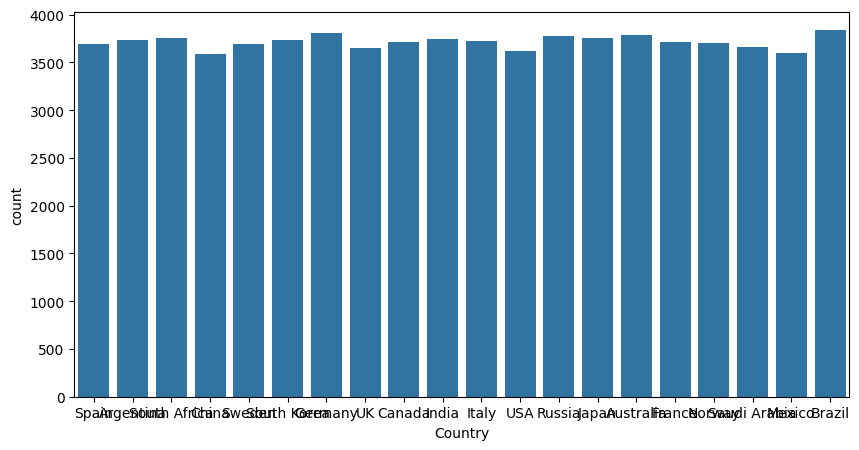

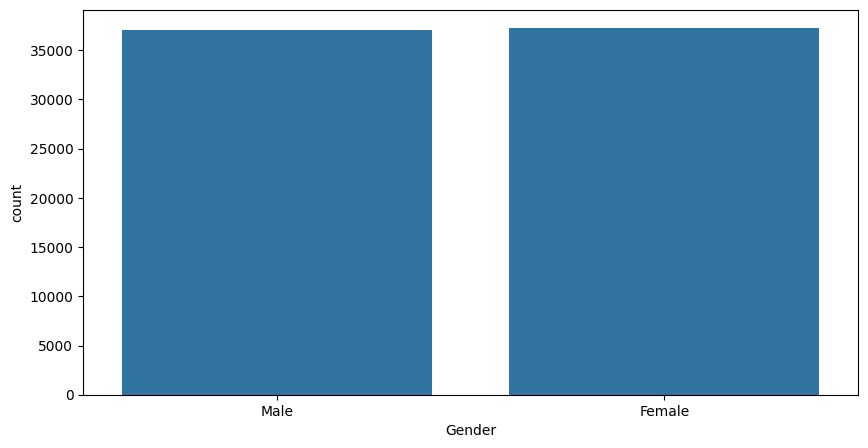

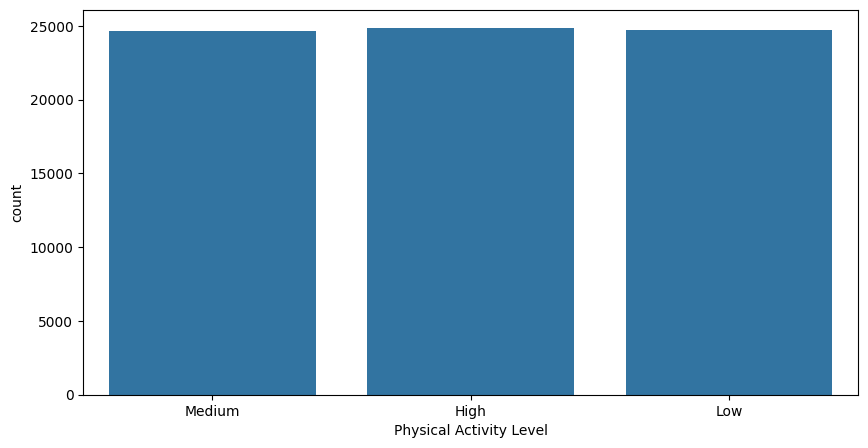

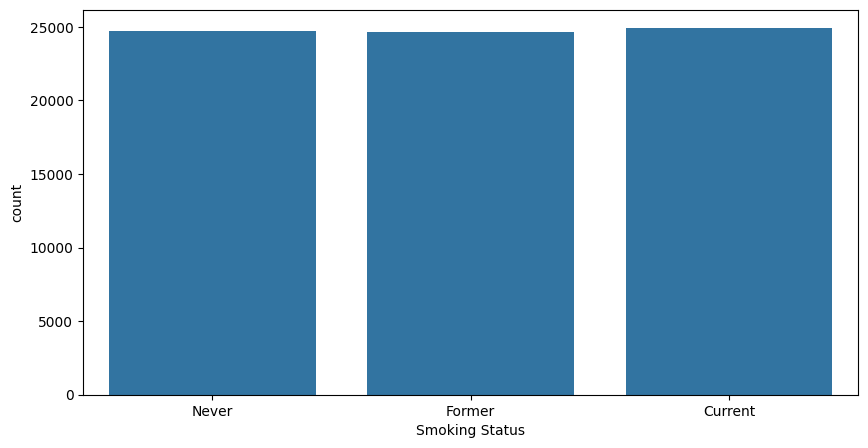

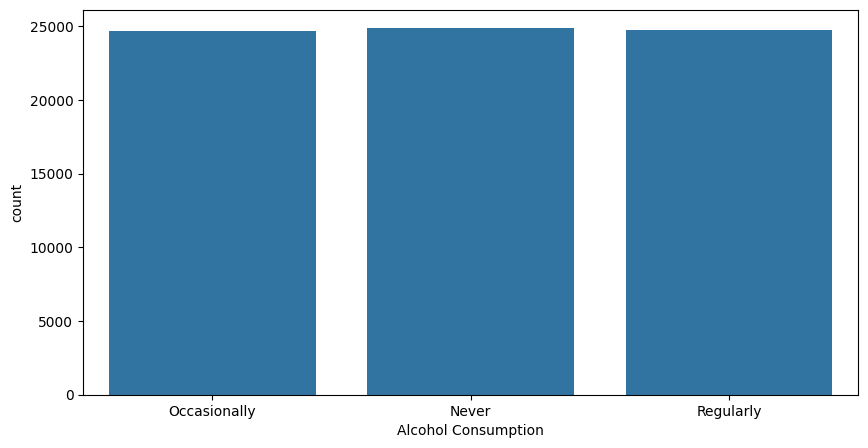

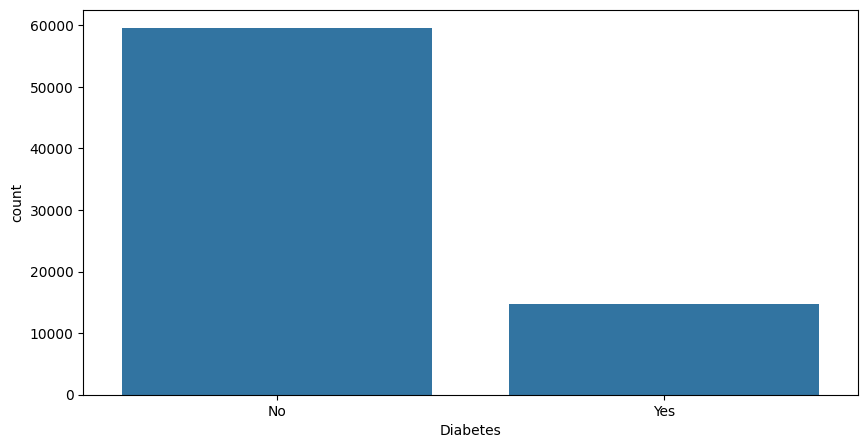

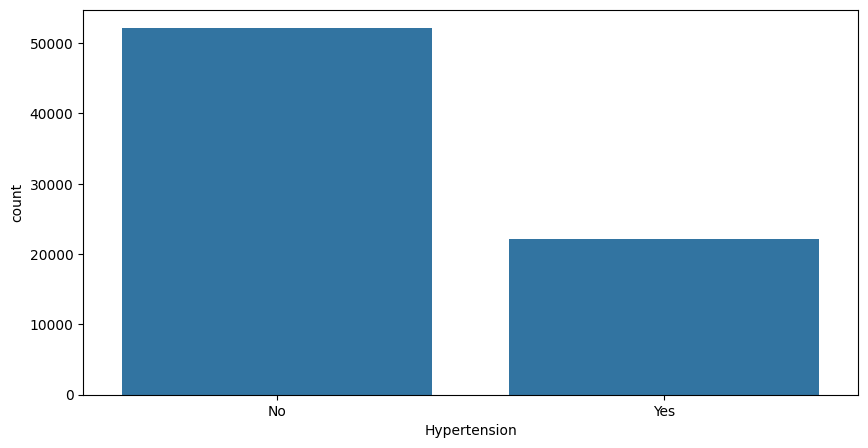

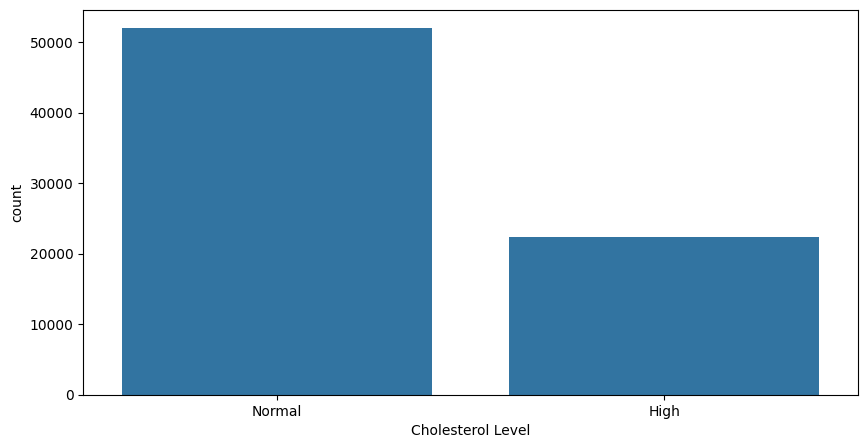

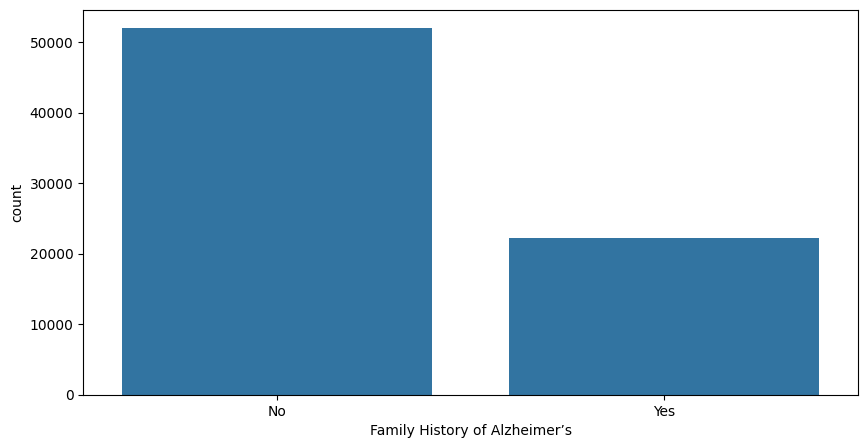

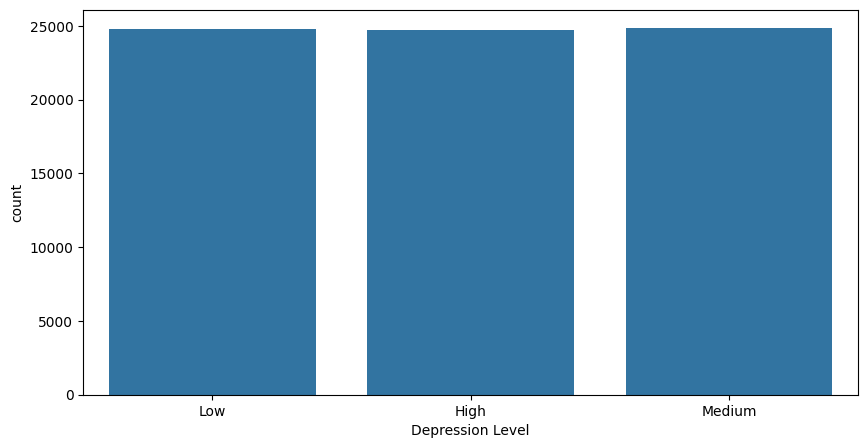

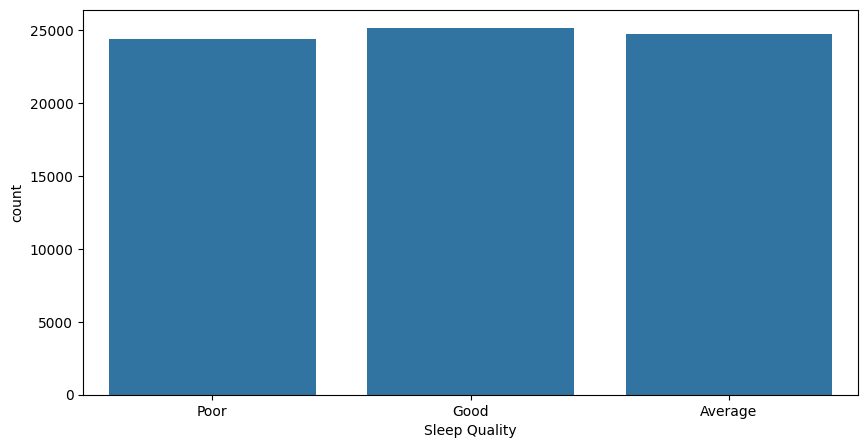

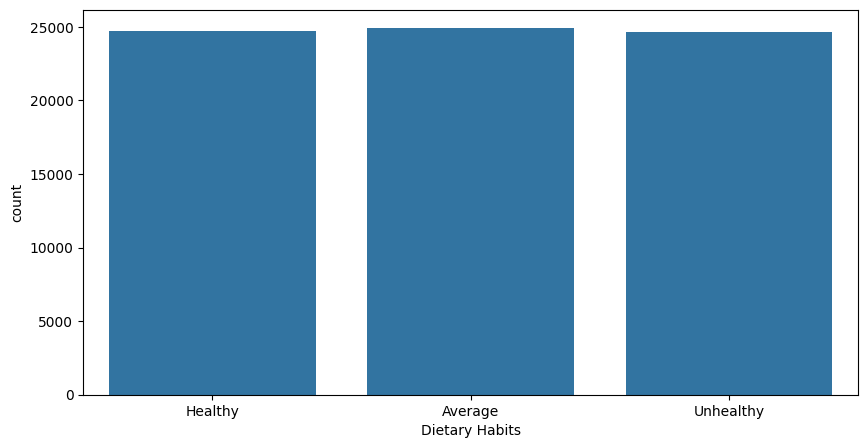

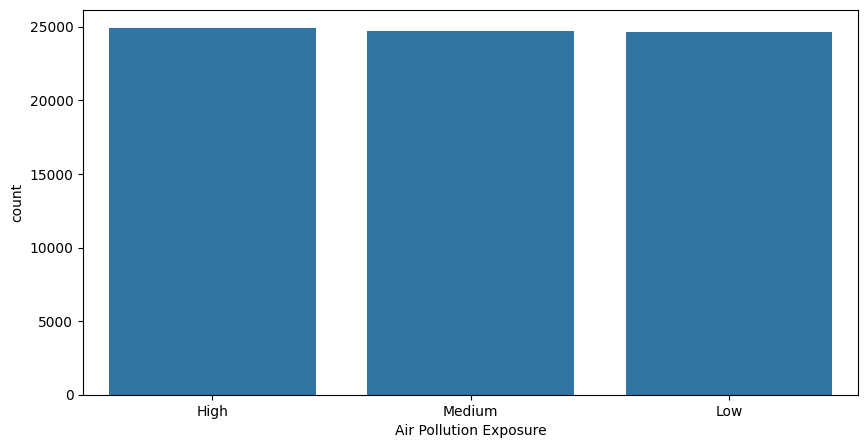

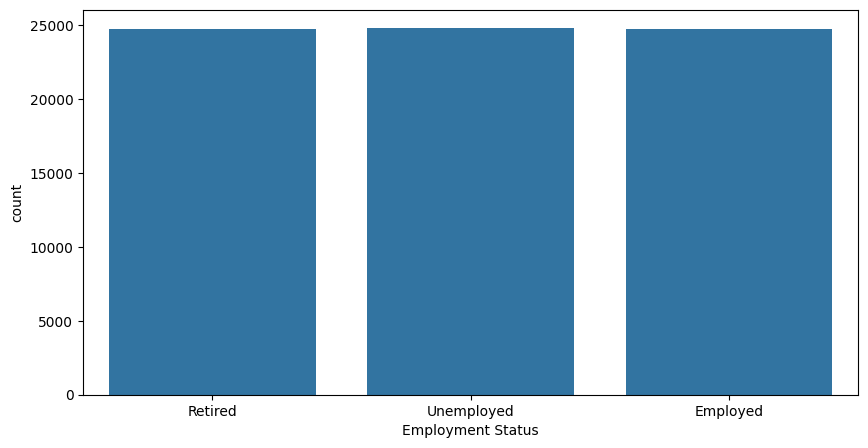

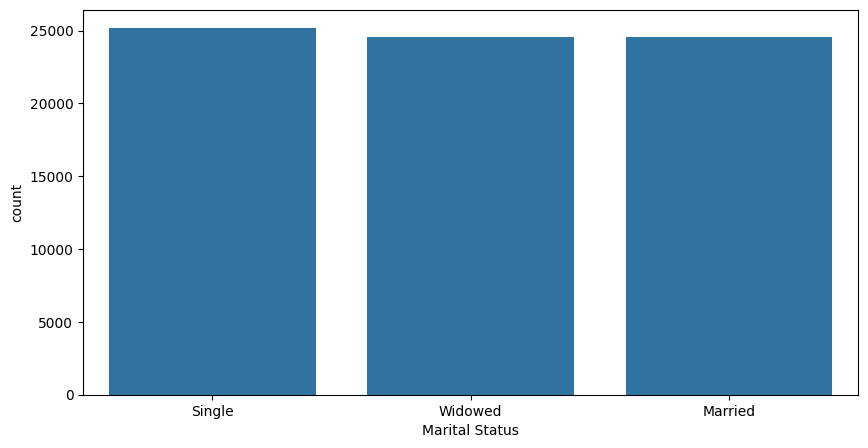

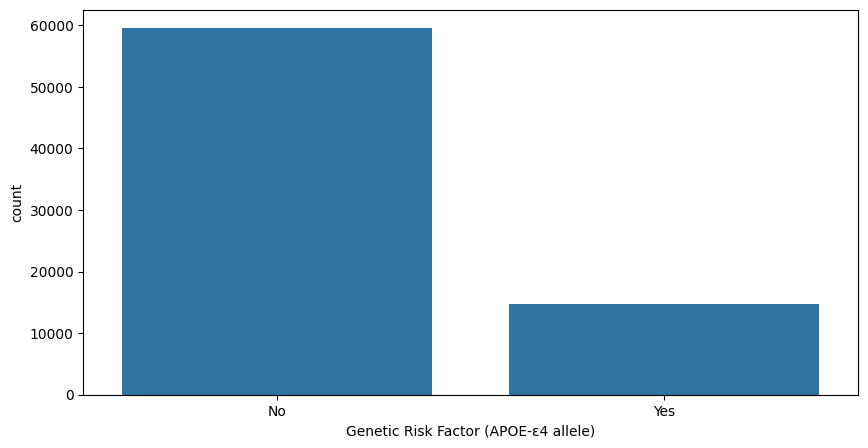

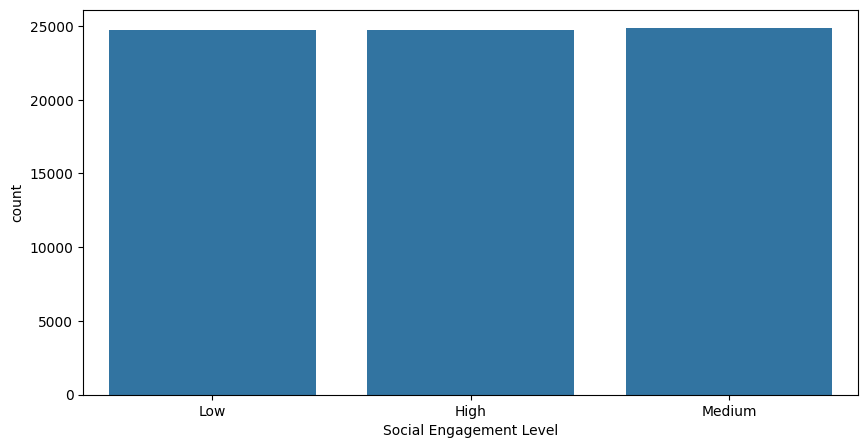

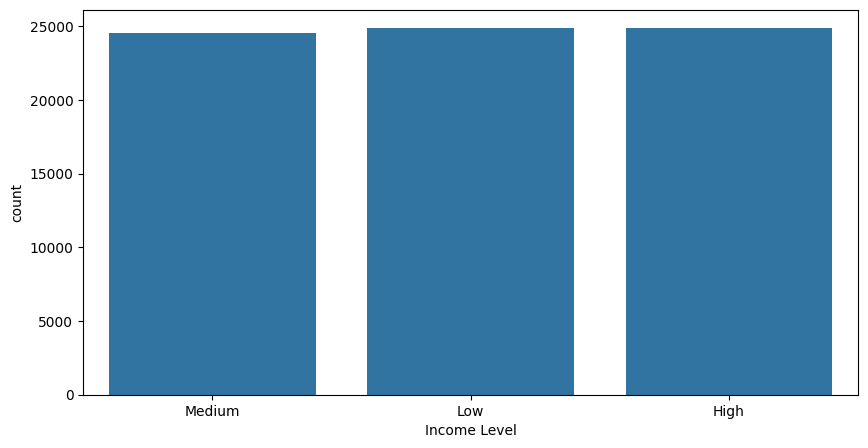

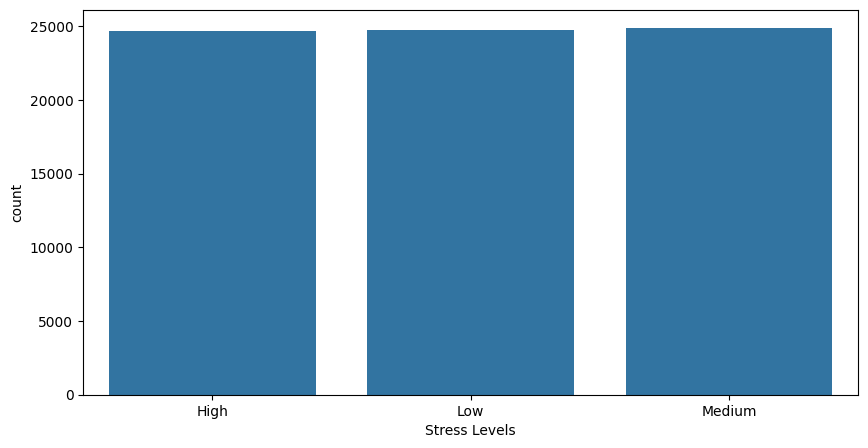

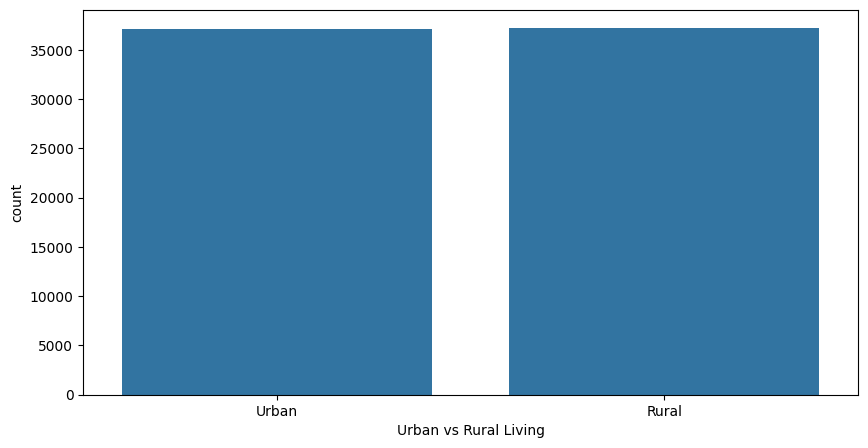

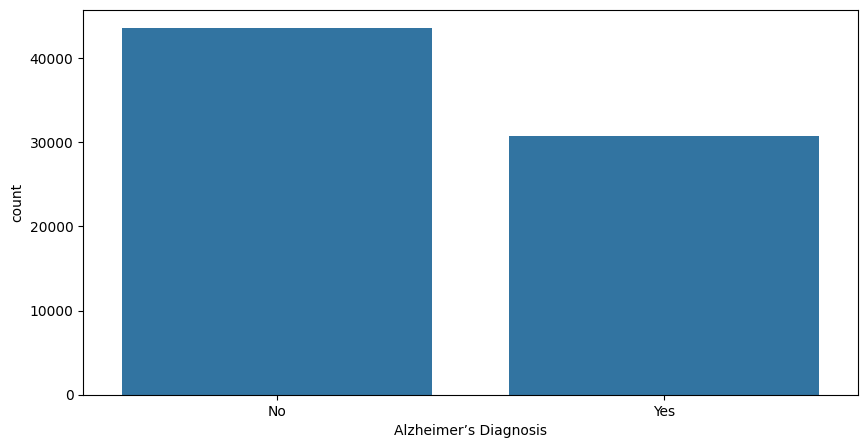

In [12]:
#data visualisation on categorical column
for col in cate_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x=df[col])
  plt.show()

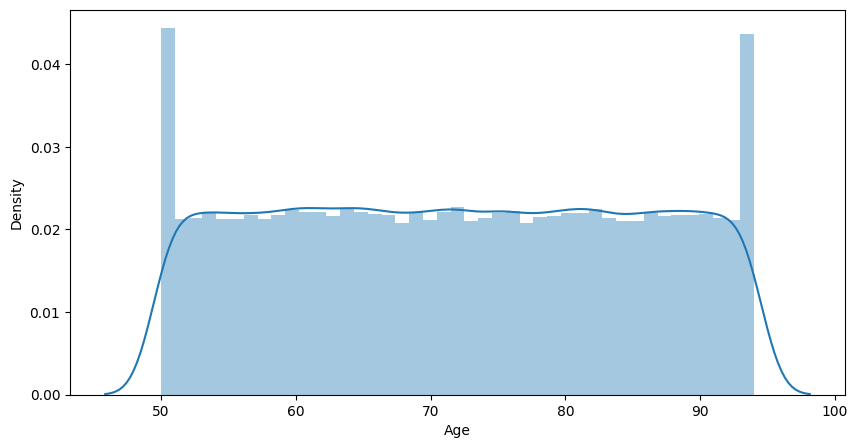

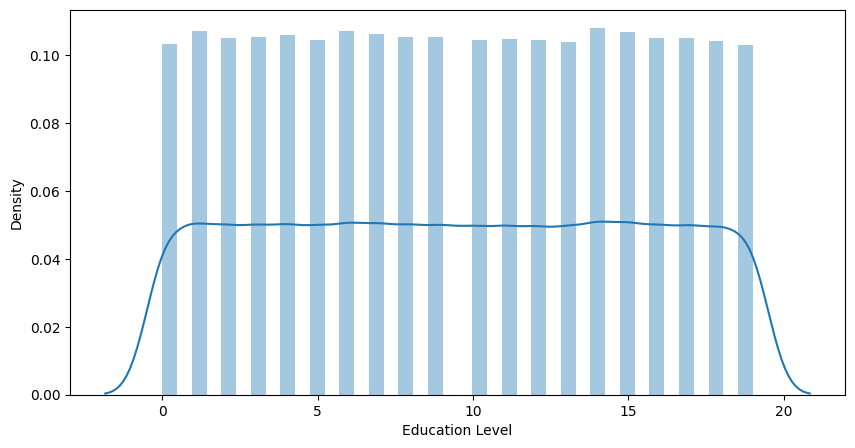

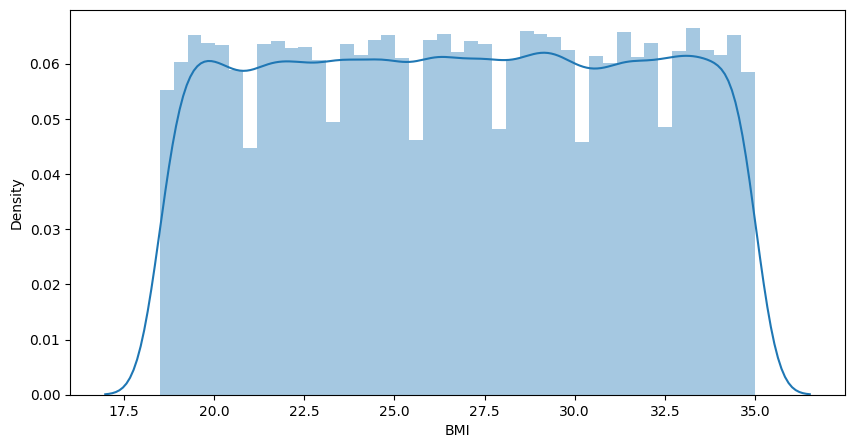

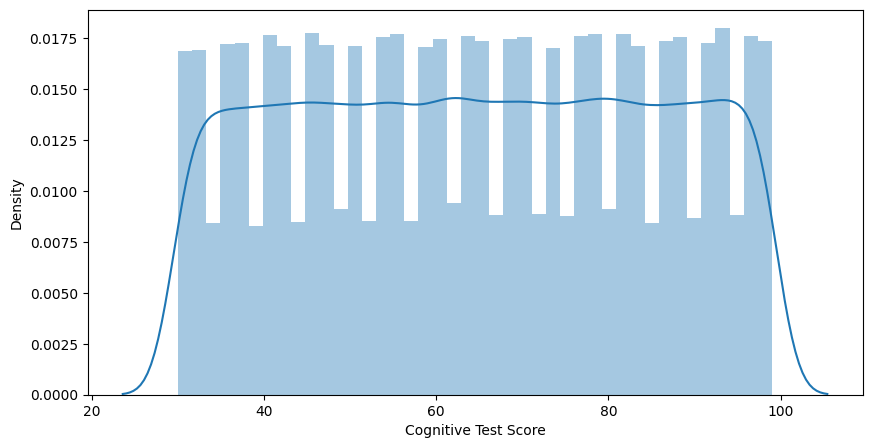

In [13]:
#data distribution on numerical columns
for col in num_col:
  plt.figure(figsize=(10,5))
  sns.distplot(df[col])
  plt.show()

#***Drop unncessay column:-***


In [14]:
#drop uncessary column for model
df.drop(['Urban vs Rural Living', 'Income Level', 'Marital Status', 'Employment Status', 'Country'], axis=1, inplace=True)

In [15]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'BMI', 'Physical Activity Level',
       'Smoking Status', 'Alcohol Consumption', 'Diabetes', 'Hypertension',
       'Cholesterol Level', 'Family History of Alzheimer’s',
       'Cognitive Test Score', 'Depression Level', 'Sleep Quality',
       'Dietary Habits', 'Air Pollution Exposure',
       'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level',
       'Stress Levels', 'Alzheimer’s Diagnosis'],
      dtype='object')

In [16]:
cate_col=df.select_dtypes(include='object').columns
cate_col

Index(['Gender', 'Physical Activity Level', 'Smoking Status',
       'Alcohol Consumption', 'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s', 'Depression Level', 'Sleep Quality',
       'Dietary Habits', 'Air Pollution Exposure',
       'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level',
       'Stress Levels', 'Alzheimer’s Diagnosis'],
      dtype='object')

#***Label Encoding:-***

In [17]:
le=LabelEncoder()
encoder={}
for i in cate_col:
  df[i]=le.fit_transform(df[i])
  encoder[i]=le.classes_

In [18]:
#save all classes in dict
encoder

{'Gender': array(['Female', 'Male'], dtype=object),
 'Physical Activity Level': array(['High', 'Low', 'Medium'], dtype=object),
 'Smoking Status': array(['Current', 'Former', 'Never'], dtype=object),
 'Alcohol Consumption': array(['Never', 'Occasionally', 'Regularly'], dtype=object),
 'Diabetes': array(['No', 'Yes'], dtype=object),
 'Hypertension': array(['No', 'Yes'], dtype=object),
 'Cholesterol Level': array(['High', 'Normal'], dtype=object),
 'Family History of Alzheimer’s': array(['No', 'Yes'], dtype=object),
 'Depression Level': array(['High', 'Low', 'Medium'], dtype=object),
 'Sleep Quality': array(['Average', 'Good', 'Poor'], dtype=object),
 'Dietary Habits': array(['Average', 'Healthy', 'Unhealthy'], dtype=object),
 'Air Pollution Exposure': array(['High', 'Low', 'Medium'], dtype=object),
 'Genetic Risk Factor (APOE-ε4 allele)': array(['No', 'Yes'], dtype=object),
 'Social Engagement Level': array(['High', 'Low', 'Medium'], dtype=object),
 'Stress Levels': array(['High', 'Low'

In [19]:
#shape of dataset
df.shape

(74283, 20)

#***correlation on basis of Target column:-***

In [20]:
# Compute correlation matrix
corr_matrix = df.corr()

In [21]:
corr_data=corr_matrix[['Alzheimer’s Diagnosis']].sort_values(by='Alzheimer’s Diagnosis', ascending=False)
corr_data

,Alzheimer’s Diagnosis
Alzheimer’s Diagnosis,1.000000
Age,0.419923
Genetic Risk Factor (APOE-ε4 allele),0.194484
Family History of Alzheimer’s,0.140885
Education Level,0.003732
Smoking Status,0.003690
Dietary Habits,0.003239
Social Engagement Level,0.002444
Cholesterol Level,0.002104
Alcohol Consumption,0.001790


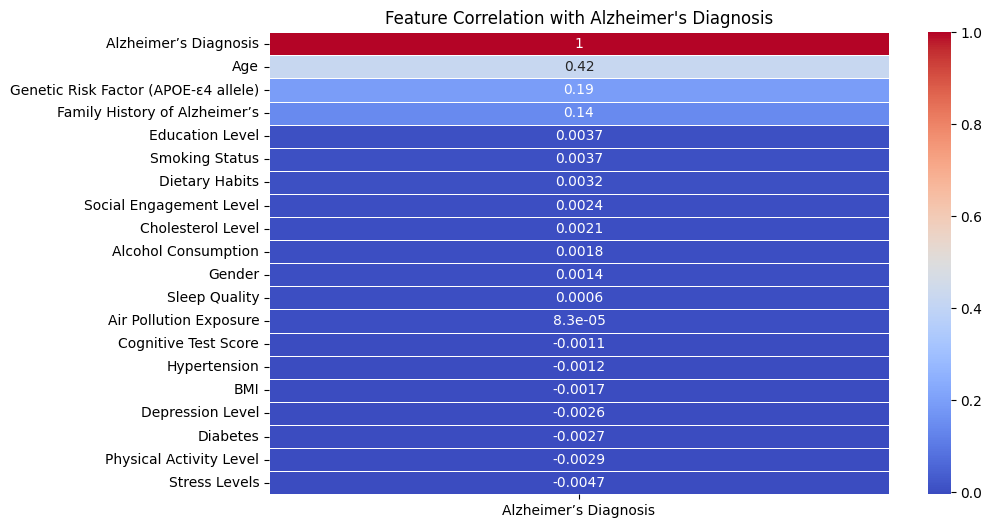

In [22]:
# Plot heatmap on basis of target column
plt.figure(figsize=(10, 6))
sns.heatmap(corr_data,annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation with Alzheimer's Diagnosis")
plt.show()

In [48]:
df

,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Cognitive Test Score,Depression Level,Sleep Quality,Dietary Habits,Air Pollution Exposure,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Stress Levels,Alzheimer’s Diagnosis
0,90,1,1,33.0,2,2,1,0,0,1,0,90,1,2,1,0,0,1,0,0
1,72,1,7,29.9,2,1,0,0,0,1,0,65,1,1,1,2,0,0,0,0
2,86,0,19,22.9,0,0,1,0,1,1,0,43,0,1,0,2,0,1,0,0
3,53,1,17,31.2,1,2,2,1,0,1,0,81,2,0,1,2,0,0,1,0
4,58,0,3,30.0,0,1,0,1,0,1,0,49,0,2,2,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,60,0,3,22.6,0,1,0,0,0,0,0,42,2,2,0,0,0,2,2,0
74279,58,1,18,30.6,1,2,1,1,0,1,0,42,1,2,0,2,0,2,0,0
74280,57,0,13,28.2,2,2,2,0,0,0,1,61,1,1,1,1,1,0,1,0
74281,73,0,7,29.0,1,2,2,0,0,0,0,97,0,1,1,1,0,1,0,0


#***spliting in to X,y:-***

In [23]:
X=df.drop('Alzheimer’s Diagnosis', axis=1)
y=df['Alzheimer’s Diagnosis']

In [24]:
y.value_counts()

,count
Alzheimer’s Diagnosis,
0,43570
1,30713


This distribution is not highly imbalanced

#***Feature Selection:-***

In [25]:
#check the ch2 featre selection method check top 12
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(score_func=chi2, k=12)  # Select top 10 features
X_new= selector.fit_transform(X, y)

In [26]:
# Get selected feature names
selected_features = X.columns[selector.get_support()].tolist()
# Display top 10 features
print("Top 12 Features Selected by Chi-Square Test:")
print(selected_features)

Top 12 Features Selected by Chi-Square Test:
['Age', 'Education Level', 'Physical Activity Level', 'Smoking Status', 'Diabetes', 'Family History of Alzheimer’s', 'Cognitive Test Score', 'Depression Level', 'Dietary Habits', 'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level', 'Stress Levels']


In [27]:
# Train a Random Forest model to compute feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance scores
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_}).sort_values(by='Importance', ascending=False)

# Display important features
print(feature_importance)

                                 Feature  Importance
0                                    Age    0.284062
3                                    BMI    0.117926
11                  Cognitive Test Score    0.108455
2                        Education Level    0.085675
16  Genetic Risk Factor (APOE-ε4 allele)    0.038044
15                Air Pollution Exposure    0.031472
17               Social Engagement Level    0.031361
18                         Stress Levels    0.031161
14                        Dietary Habits    0.031029
12                      Depression Level    0.030853
4                Physical Activity Level    0.030743
13                         Sleep Quality    0.030337
5                         Smoking Status    0.030284
6                    Alcohol Consumption    0.029246
10         Family History of Alzheimer’s    0.022421
1                                 Gender    0.019836
9                      Cholesterol Level    0.016603
8                           Hypertension    0.

In [28]:
#drop the column according to correlation and feature selection method
drop_features=['Gender','Cholesterol Level','Hypertension','Diabetes','Air Pollution Exposure','Alcohol Consumption','Smoking Status']
# Drop them from the dataset
X.drop(columns=drop_features, inplace=True)

In [29]:
#drop the clases from encoder which in this drop_features
for i in drop_features:
  del encoder[i]

In [30]:
encoder

{'Physical Activity Level': array(['High', 'Low', 'Medium'], dtype=object),
 'Family History of Alzheimer’s': array(['No', 'Yes'], dtype=object),
 'Depression Level': array(['High', 'Low', 'Medium'], dtype=object),
 'Sleep Quality': array(['Average', 'Good', 'Poor'], dtype=object),
 'Dietary Habits': array(['Average', 'Healthy', 'Unhealthy'], dtype=object),
 'Genetic Risk Factor (APOE-ε4 allele)': array(['No', 'Yes'], dtype=object),
 'Social Engagement Level': array(['High', 'Low', 'Medium'], dtype=object),
 'Stress Levels': array(['High', 'Low', 'Medium'], dtype=object),
 'Alzheimer’s Diagnosis': array(['No', 'Yes'], dtype=object)}

In [31]:
X.shape

(74283, 12)

#***Split In to Train and Test:-***

In [32]:
#split the train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#***Chose the Best Model:-***

In [33]:
#for loop for all classification model
models = {"Random Forest": RandomForestClassifier(n_estimators=100,random_state=42),
          "Logistic Regression": LogisticRegression(),
          "K-Nearest Neighbors": KNeighborsClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
          "Support Vector Machine": SVC(),
          "Naive Bayes": GaussianNB()}

In [34]:
# Dictionary to store accuracy scores
accuracy_scores = {}

In [35]:
# Loop through models, train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    print(f"{name}: Accuracy = {accuracy:.4f}")

Random Forest: Accuracy = 0.7143
Logistic Regression: Accuracy = 0.7127
K-Nearest Neighbors: Accuracy = 0.6694
Decision Tree: Accuracy = 0.6313
Support Vector Machine: Accuracy = 0.7125
Naive Bayes: Accuracy = 0.6997


#***Train Best model:-***

In [36]:
rfc=RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [37]:
y_pred=rfc.predict(X_test)

In [43]:
#evaluate
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7142760988086424

#***Save the Model & Encoder:-***

In [46]:
import joblib
joblib.dump(rfc, 'model.pkl')
print("Model saved successfully!")

Model saved successfully!


In [47]:
#save encoder
joblib.dump(encoder, 'encoder.pkl')
print("Encoder saved successfully!")

Encoder saved successfully!
